In [1]:
# Data manipulations
import pandas as pd
import numpy as np
import utils
# Data visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.offline as pyo
import plotly.io as pio

# Data pre-processing
import missingno as msno
from sklearn.preprocessing import LabelEncoder  
from sklearn.impute import SimpleImputer

# Date handller
import time
from datetime import datetime, timedelta, date

# For serialization and warning purpose
import pickle
import warnings
warnings.filterwarnings('ignore')
pio.renderers.default='notebook' # charts export to HTML
# pd.set_option('display.height', 500)
# pd.set_option('display.max_rows', 500)
# pd.reset_option('display.max_rows')  OR pd.reset_option('all')

C:\Users\sagar\AppData\Local\Temp\ipykernel_5772\1940575012.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [12]:
df21 = pd.read_csv("D:/Price_Prediction/res_occ_21.csv")
df22 = pd.read_csv("D:/Price_Prediction/res_occ_22.csv")

In [52]:
def missingValues(data):
    missing_val = data.isna().sum()
    print('Missing values:', missing_val)
    return display(msno.matrix(data))

def missingValueFfiller(data, val1):
    data[val1] = data[val1].ffill()
    return data

def toIntValue(data, val1):
    data[val1] = data[val1].astype(int)
    return data

# Converting to date formart
def toDateFormat(data, val1):
    data[val1] = pd.to_datetime(data[val1], errors='coerce')
    return data

In [152]:
print(len(df21.columns.to_list()),len(df22.columns.to_list()))

12 12


In [154]:
display(df21, df22)

,index,Date,Day,Available,Occupied,ADR,Nights,Rate,RateCode,Type,Source,TrackCode
0,0,2021-01-01,Fri,1,99,91.72,7,65.00,LPSS,NK,DIRECT,CORPORATE
1,1,2021-01-02,Sat,5,94,90.27,1,SRD RATE,SRD Rate,NQQ,CRS,LEISURE
2,2,2021-01-03,Sun,49,51,74.75,4,70.00,LPSS,NQQ,DIRECT,CORPORATE
3,3,2021-01-03,Sun,49,51,74.75,5,70.00,LPSS,NK,DIRECT,CORPORATE
4,4,2021-01-03,Sun,49,51,74.75,5,70.00,LPSS,NQQ,DIRECT,CORPORATE
...,...,...,...,...,...,...,...,...,...,...,...,...
5092,5092,2021-12-31,Fri,19,81,105.58,1,94.29,LEXP,NK,CRS,CORPORATE
5093,5093,2021-12-31,Fri,19,81,105.58,1,85.00,BAR,NQQ,WI,LEISURE
5094,5094,2021-12-31,Fri,19,81,105.58,2,134.83,SCPM,NK,CRS,LEISURE
5095,5095,2021-12-31,Fri,19,81,105.58,1,85.00,LMANAG,NK,DIRECT,CORPORATE


,index,Date,Nights,Rate,Rate Code,Type,Source,Track Code,Day,Available,Occupied,ADR
0,0,2022-01-01,2,70.00,LBLREP,NQQ,DIRECT,CORPORATE,Sat,21,79,92.58
1,1,2022-01-01,7,70.00,LPSS,NQQ,DIRECT,CORPORATE,Sat,21,79,92.58
2,2,2022-01-01,1,84.55,LMANAG,SNQQ,WI,CORPORATE,Sat,21,79,92.58
3,3,2022-01-01,1,99.00,BAR,SNK,DIRECT,CORPORATE,Sat,21,79,92.58
4,4,2022-01-01,1,109.00,BAR,NQQ,DIRECT,CORPORATE,Sat,21,79,92.58
...,...,...,...,...,...,...,...,...,...,...,...,...
26343,26343,2022-12-31,1,81.75,SNP,SNK,CRS,CORPORATE,Sat,13,87,98.90
26344,26344,2022-12-31,1,134.00,SRTL,NHQQ,CRS,NaN,Sat,13,87,98.90
26345,26345,2022-12-31,1,103.55,SCPM,NK,CRS,NaN,Sat,13,87,98.90
26346,26346,2022-12-31,1,81.75,SNP,NK,CRS,CORPORATE,Sat,13,87,98.90


In [171]:
df22.rename(columns = {'Rate Code':'RateCode'}, inplace = True)

In [172]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5097 entries, 0 to 5096
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      5097 non-null   int64  
 1   Date       5097 non-null   object 
 2   Day        5097 non-null   object 
 3   Available  5097 non-null   int64  
 4   Occupied   5097 non-null   int64  
 5   ADR        5097 non-null   float64
 6   Nights     5097 non-null   int64  
 7   Rate       5097 non-null   object 
 8   RateCode   5097 non-null   object 
 9   Type       5097 non-null   object 
 10  Source     5097 non-null   object 
 11  TrackCode  4983 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 478.0+ KB


In [163]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26348 entries, 0 to 26347
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       26348 non-null  int64  
 1   Date        26348 non-null  object 
 2   Nights      26348 non-null  int64  
 3   Rate        26348 non-null  object 
 4   Rate Code   26348 non-null  object 
 5   Type        26348 non-null  object 
 6   Source      26348 non-null  object 
 7   Track Code  23155 non-null  object 
 8   Day         26348 non-null  object 
 9   Available   26348 non-null  int64  
 10  Occupied    26348 non-null  int64  
 11  ADR         26348 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 2.4+ MB


In [173]:
df33 = pd.concat([df21, df22], axis=0)

In [174]:
df33

,index,Date,Day,Available,Occupied,ADR,Nights,Rate,RateCode,Type,Source,TrackCode
0,0,2021-01-01,Fri,1,99,91.72,7,65.00,LPSS,NK,DIRECT,CORPORATE
1,1,2021-01-02,Sat,5,94,90.27,1,SRD RATE,SRD Rate,NQQ,CRS,LEISURE
2,2,2021-01-03,Sun,49,51,74.75,4,70.00,LPSS,NQQ,DIRECT,CORPORATE
3,3,2021-01-03,Sun,49,51,74.75,5,70.00,LPSS,NK,DIRECT,CORPORATE
4,4,2021-01-03,Sun,49,51,74.75,5,70.00,LPSS,NQQ,DIRECT,CORPORATE
...,...,...,...,...,...,...,...,...,...,...,...,...
26343,26343,2022-12-31,Sat,13,87,98.90,1,81.75,SNP,SNK,CRS,CORPORATE
26344,26344,2022-12-31,Sat,13,87,98.90,1,134.00,SRTL,NHQQ,CRS,NaN
26345,26345,2022-12-31,Sat,13,87,98.90,1,103.55,SCPM,NK,CRS,NaN
26346,26346,2022-12-31,Sat,13,87,98.90,1,81.75,SNP,NK,CRS,CORPORATE


Missing values: index           0
Date            0
Day             0
Available       0
Occupied        0
ADR             0
Nights          0
Rate            0
RateCode        0
Type            0
Source          0
TrackCode    3307
dtype: int64


<AxesSubplot: >

After imputation...


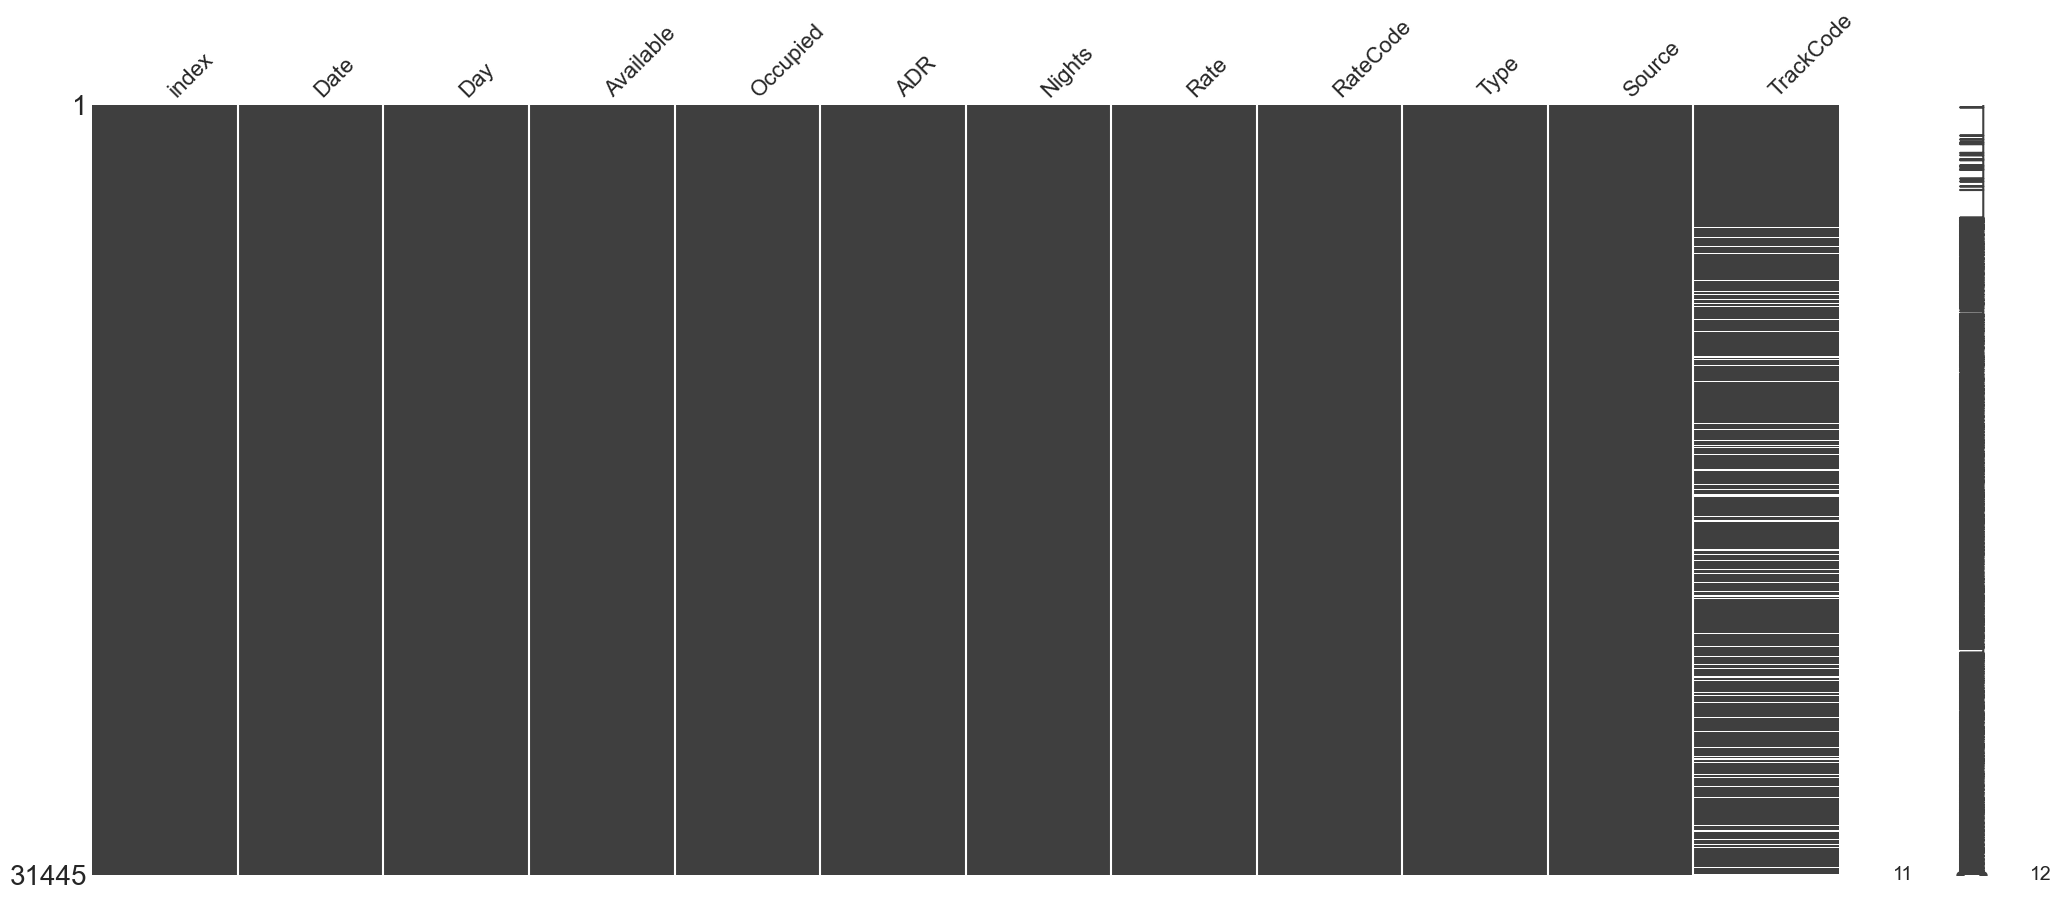

In [176]:
# Missing values data
missingValues(df33)

# TrackCode missing data
# df = missingValueFfiller(df, 'TrackCode')

print('After imputation...')
# missingValues(df)

In [236]:
df1 = df33.copy()

In [208]:
df1

,index,Date,Day,Available,Occupied,ADR,Nights,Rate,RateCode,Type,Source,TrackCode
0,0,2021-01-01,Fri,1,99,91.72,7,65.00,LPSS,NK,DIRECT,CORPORATE
1,1,2021-01-02,Sat,5,94,90.27,1,SRD RATE,SRD Rate,NQQ,CRS,LEISURE
2,2,2021-01-03,Sun,49,51,74.75,4,70.00,LPSS,NQQ,DIRECT,CORPORATE
3,3,2021-01-03,Sun,49,51,74.75,5,70.00,LPSS,NK,DIRECT,CORPORATE
4,4,2021-01-03,Sun,49,51,74.75,5,70.00,LPSS,NQQ,DIRECT,CORPORATE
...,...,...,...,...,...,...,...,...,...,...,...,...
26343,26343,2022-12-31,Sat,13,87,98.90,1,81.75,SNP,SNK,CRS,CORPORATE
26344,26344,2022-12-31,Sat,13,87,98.90,1,134.00,SRTL,NHQQ,CRS,NaN
26345,26345,2022-12-31,Sat,13,87,98.90,1,103.55,SCPM,NK,CRS,NaN
26346,26346,2022-12-31,Sat,13,87,98.90,1,81.75,SNP,NK,CRS,CORPORATE


In [237]:
# filling with Unknown class                                                                # Changeeee
df1["TrackCode"] = df1["TrackCode"].fillna("Missing")
df1["TrackCode"].isnull().sum()

0

In [210]:
df1.isnull().sum()

index        0
Date         0
Day          0
Available    0
Occupied     0
ADR          0
Nights       0
Rate         0
RateCode     0
Type         0
Source       0
TrackCode    0
dtype: int64

In [238]:
pd.concat([df1.Rate.value_counts(normalize=True), df1.Rate.value_counts()], axis=1, keys=('%','Counts')).head(12)

,%,Counts
70.00,0.195325,6142
65.00,0.051296,1613
SRD RATE,0.033678,1059
99.00,0.023947,753
129.00,0.021148,665
109.00,0.019176,603
119.00,0.018477,581
85.00,0.018031,567
115.00,0.015297,481
90.00,0.014851,467


In [195]:
df1.Rate.min(), df1.Rate.max()

('0.00', 'SRD RATE')

In [240]:
print(df1.Rate.min())

# Taking out from SRD Rate string
srd_rate_temp = df1[df1.Rate != 'SRD RATE']
srd_rate_temp.Rate.min(), srd_rate_temp.Rate.max()

# Remove comma separated from string and convert to numeric format
srd_rate_temp['Rate']  = srd_rate_temp['Rate'].str.replace(',', '').astype(float)
srd_rate_temp.info()
# srd_median_value = round(srd_rate_temp['Rate'].median(),2)
# srd_median_value

0.00
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30386 entries, 0 to 26347
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      30386 non-null  int64  
 1   Date       30386 non-null  object 
 2   Day        30386 non-null  object 
 3   Available  30386 non-null  int64  
 4   Occupied   30386 non-null  int64  
 5   ADR        30386 non-null  float64
 6   Nights     30386 non-null  int64  
 7   Rate       30386 non-null  float64
 8   RateCode   30386 non-null  object 
 9   Type       30386 non-null  object 
 10  Source     30386 non-null  object 
 11  TrackCode  30386 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 3.0+ MB


In [204]:
srd_rate_temp.describe()

,index,Available,Occupied,ADR,Nights,Rate
count,30386.000000,30386.000000,30386.000000,30386.000000,30386.000000,30386.000000
mean,11590.294971,5.342888,94.288718,99.890884,1.847923,102.737624
std,7976.263648,9.122602,9.456186,23.588992,2.293362,36.339209
min,0.000000,0.000000,51.000000,32.560000,0.000000,0.000000
25%,4087.250000,0.000000,92.000000,82.710000,1.000000,70.000000
50%,10892.500000,0.000000,99.000000,90.100000,1.000000,98.800000
75%,18576.750000,7.000000,100.000000,114.730000,2.000000,120.000000
max,26347.000000,49.000000,100.000000,173.640000,141.000000,999.000000


In [241]:
print(df1.shape)                                                                       # not included.....
res = df1[df1.Rate != '999.00']
print(res.shape)

(31445, 12)
(31444, 12)


In [211]:
fig = px.box(df1, y="Rate")
fig.show()

In [242]:


# Taking out from SRD Rate string
# srd_rate_temp = df1[df1.Rate != 'SRD RATE']
# srd_rate_temp.Rate.min(), srd_rate_temp.Rate.max()

# # Remove comma separated from string and convert to numeric format
# srd_rate_temp['Rate']  = srd_rate_temp['Rate'].str.replace(',', '').astype(float)
# srd_rate_temp.info()
srd_mean_value = round(srd_rate_temp['Rate'].mean(),2)
srd_mean_value

102.74

In [243]:
df1['Rate'] = df1['Rate'].str.replace('SRD RATE', '85').astype(float)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31445 entries, 0 to 26347
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      31445 non-null  int64  
 1   Date       31445 non-null  object 
 2   Day        31445 non-null  object 
 3   Available  31445 non-null  int64  
 4   Occupied   31445 non-null  int64  
 5   ADR        31445 non-null  float64
 6   Nights     31445 non-null  int64  
 7   Rate       31445 non-null  float64
 8   RateCode   31445 non-null  object 
 9   Type       31445 non-null  object 
 10  Source     31445 non-null  object 
 11  TrackCode  31445 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 3.1+ MB


In [244]:
def dateExtractor(data, val1):
    data['Year'], data['Month'], data['Days'] = data[val1].dt.year, data[val1].dt.month, data[val1].dt.day
    return data

In [245]:
df1["Date"] = pd.to_datetime(df1["Date"])

In [246]:
df1 = dateExtractor(df1, 'Date')
df1

,index,Date,Day,Available,Occupied,ADR,Nights,Rate,RateCode,Type,Source,TrackCode,Year,Month,Days
0,0,2021-01-01,Fri,1,99,91.72,7,65.00,LPSS,NK,DIRECT,CORPORATE,2021,1,1
1,1,2021-01-02,Sat,5,94,90.27,1,85.00,SRD Rate,NQQ,CRS,LEISURE,2021,1,2
2,2,2021-01-03,Sun,49,51,74.75,4,70.00,LPSS,NQQ,DIRECT,CORPORATE,2021,1,3
3,3,2021-01-03,Sun,49,51,74.75,5,70.00,LPSS,NK,DIRECT,CORPORATE,2021,1,3
4,4,2021-01-03,Sun,49,51,74.75,5,70.00,LPSS,NQQ,DIRECT,CORPORATE,2021,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26343,26343,2022-12-31,Sat,13,87,98.90,1,81.75,SNP,SNK,CRS,CORPORATE,2022,12,31
26344,26344,2022-12-31,Sat,13,87,98.90,1,134.00,SRTL,NHQQ,CRS,Missing,2022,12,31
26345,26345,2022-12-31,Sat,13,87,98.90,1,103.55,SCPM,NK,CRS,Missing,2022,12,31
26346,26346,2022-12-31,Sat,13,87,98.90,1,81.75,SNP,NK,CRS,CORPORATE,2022,12,31


In [247]:
df1 = df1[['Date', 'Year', 'Month', 'Days', 'Nights', 'Type', 'RateCode', 'TrackCode', 'Rate', 
                             'Occupied', 'ADR']]
display(df1)
df1.info()

,Date,Year,Month,Days,Nights,Type,RateCode,TrackCode,Rate,Occupied,ADR
0,2021-01-01,2021,1,1,7,NK,LPSS,CORPORATE,65.00,99,91.72
1,2021-01-02,2021,1,2,1,NQQ,SRD Rate,LEISURE,85.00,94,90.27
2,2021-01-03,2021,1,3,4,NQQ,LPSS,CORPORATE,70.00,51,74.75
3,2021-01-03,2021,1,3,5,NK,LPSS,CORPORATE,70.00,51,74.75
4,2021-01-03,2021,1,3,5,NQQ,LPSS,CORPORATE,70.00,51,74.75
...,...,...,...,...,...,...,...,...,...,...,...
26343,2022-12-31,2022,12,31,1,SNK,SNP,CORPORATE,81.75,87,98.90
26344,2022-12-31,2022,12,31,1,NHQQ,SRTL,Missing,134.00,87,98.90
26345,2022-12-31,2022,12,31,1,NK,SCPM,Missing,103.55,87,98.90
26346,2022-12-31,2022,12,31,1,NK,SNP,CORPORATE,81.75,87,98.90


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31445 entries, 0 to 26347
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       31445 non-null  datetime64[ns]
 1   Year       31445 non-null  int64         
 2   Month      31445 non-null  int64         
 3   Days       31445 non-null  int64         
 4   Nights     31445 non-null  int64         
 5   Type       31445 non-null  object        
 6   RateCode   31445 non-null  object        
 7   TrackCode  31445 non-null  object        
 8   Rate       31445 non-null  float64       
 9   Occupied   31445 non-null  int64         
 10  ADR        31445 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 2.9+ MB


In [248]:
yield_data = pd.read_excel("D:/Price_Prediction/DATA/yield_rates_dummy.xlsx", engine='openpyxl')
display(yield_data.info(), yield_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OccupancyLevel  10 non-null     object 
 1   0Day            10 non-null     float64
 2   1Day            10 non-null     float64
 3   2Day            10 non-null     float64
 4   7Day            10 non-null     float64
 5   15Day           10 non-null     float64
 6   30Day           10 non-null     float64
 7   60Day           10 non-null     float64
 8   90Day           10 non-null     float64
 9   MaxDay          10 non-null     float64
dtypes: float64(9), object(1)
memory usage: 928.0+ bytes


None

,OccupancyLevel,0Day,1Day,2Day,7Day,15Day,30Day,60Day,90Day,MaxDay
0,0-10,-0.20,-0.17,-0.15,-0.12,-0.10,-0.07,-0.05,-0.02,0.02
1,11-20,-0.17,-0.15,-0.12,-0.10,-0.07,-0.05,-0.02,0.02,0.05
2,21-30,-0.15,-0.12,-0.10,-0.07,-0.05,-0.02,0.02,0.05,0.07
3,31-40,-0.12,-0.10,-0.07,-0.05,-0.02,0.02,0.05,0.07,0.10
4,41-50,-0.10,-0.07,-0.05,-0.02,0.02,0.05,0.07,0.10,0.12
5,51-60,-0.07,-0.05,-0.02,0.02,0.05,0.07,0.10,0.12,0.15
6,61-70,-0.05,-0.02,0.02,0.05,0.07,0.10,0.12,0.15,0.17
7,71-80,-0.02,0.02,0.05,0.07,0.10,0.12,0.15,0.17,0.20
8,81-90,0.02,0.05,0.07,0.10,0.12,0.15,0.17,0.20,0.20
9,91-100,0.05,0.07,0.10,0.12,0.15,0.17,0.20,0.20,0.20


In [249]:
# Define the ranges for iterating the yield data
day0, day1, day2, day7, day15, day30, day60, day90, dayMax = list(range(0,1)), \
            list(range(1,2)), list(range(2,3)), list(range(3,8)), list(range(8,16)), list(range(16,31)), \
            list(range(31,61)), list(range(61,91)), list(range(91,151))

occ_slot1, occ_slot2, occ_slot3, occ_slot4, occ_slot5, occ_slot6, occ_slot7, occ_slot8, occ_slot9, occ_slot10 = \
            list(range(0,11)), list(range(11,21)), list(range(21,31)), list(range(31,41)), list(range(41,51)), \
            list(range(51,61)), list(range(61,71)), list(range(71,81)), list(range(81,91)), list(range(91,101))

In [250]:
# Expected check-in iterator function (column-wise)
def get_time_slot(expected_checkin_slot):
    if expected_checkin_slot in day0: return '0Day'
    elif expected_checkin_slot in day1: return '1Day'
    elif expected_checkin_slot in day2: return '2Day'
    elif expected_checkin_slot in day7: return '7Day'
    elif expected_checkin_slot in day15: return '15Day'
    elif expected_checkin_slot in day30: return '30Day'
    elif expected_checkin_slot in day60: return '60Day'
    elif expected_checkin_slot in day90: return '90Day'
    else: return 'dayMax'
    
# Ocupancy level iterator function (row-wise)
def get_occupancy_slot(occupied_data):
    if occupied_data in occ_slot1: return yield_data.index[0]
    elif occupied_data in occ_slot2: return yield_data.index[1]
    elif occupied_data in occ_slot3: return yield_data.index[2]
    elif occupied_data in occ_slot4: return yield_data.index[3]
    elif occupied_data in occ_slot5: return yield_data.index[4]
    elif occupied_data in occ_slot6: return yield_data.index[5]
    elif occupied_data in occ_slot7: return yield_data.index[6]
    elif occupied_data in occ_slot8: return yield_data.index[7]
    elif occupied_data in occ_slot9: return yield_data.index[8]
    elif occupied_data in occ_slot10: return yield_data.index[9]
    else: return yield_data.index[0]

In [251]:
import holidays
from datetime import date

In [252]:
# US federal holiday calendar
us_holidays = holidays.US()

us_hld_date_temp = []
us_hld_occ_temp = []

for date, occasion in holidays.US(years=range(2021, 2022)).items():
#     print(f'{date} - {occasion}')
    us_hld_date_temp.append(date)
    us_hld_occ_temp.append(occasion)

In [253]:
def colRename(data, val1, val2):
    data.rename({val1:val2}, axis='columns', inplace=True)

In [254]:
# Holiday dataframe conversion
h_h = pd.DataFrame(list(zip(us_hld_date_temp, us_hld_occ_temp)),
               columns =['USHoliday', 'HolidayName'])

toDateFormat(h_h, 'USHoliday')
colRename(h_h, 'USHoliday', 'Date')

print(len(h_h))
h_h.tail()

15


,Date,HolidayName
10,2021-10-11,Columbus Day
11,2021-11-11,Veterans Day
12,2021-11-25,Thanksgiving
13,2021-12-25,Christmas Day
14,2021-12-24,Christmas Day (Observed)


In [255]:
df1 = pd.merge(df1, h_h, on='Date', how='outer')
df1

,Date,Year,Month,Days,Nights,Type,RateCode,TrackCode,Rate,Occupied,ADR,HolidayName
0,2021-01-01,2021.0,1.0,1.0,7.0,NK,LPSS,CORPORATE,65.00,99.0,91.72,New Year's Day
1,2021-01-02,2021.0,1.0,2.0,1.0,NQQ,SRD Rate,LEISURE,85.00,94.0,90.27,NaN
2,2021-01-03,2021.0,1.0,3.0,4.0,NQQ,LPSS,CORPORATE,70.00,51.0,74.75,NaN
3,2021-01-03,2021.0,1.0,3.0,5.0,NK,LPSS,CORPORATE,70.00,51.0,74.75,NaN
4,2021-01-03,2021.0,1.0,3.0,5.0,NQQ,LPSS,CORPORATE,70.00,51.0,74.75,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
31441,2022-12-31,2022.0,12.0,31.0,1.0,NHQQ,SRTL,Missing,134.00,87.0,98.90,NaN
31442,2022-12-31,2022.0,12.0,31.0,1.0,NK,SCPM,Missing,103.55,87.0,98.90,NaN
31443,2022-12-31,2022.0,12.0,31.0,1.0,NK,SNP,CORPORATE,81.75,87.0,98.90,NaN
31444,2022-12-31,2022.0,12.0,31.0,1.0,NQQ,BAR,CORPORATE,99.00,87.0,98.90,NaN


In [256]:
df1.Year.isna().sum()

1

In [257]:
# Selecting non-NA records w.r.t. column RateCode (left side of data)
df = df1[df1['RateCode'].notna()]
print(len(df), df.RateCode.isna().sum(), df.HolidayName.isna().sum())
df

31445 0 31207


,Date,Year,Month,Days,Nights,Type,RateCode,TrackCode,Rate,Occupied,ADR,HolidayName
0,2021-01-01,2021.0,1.0,1.0,7.0,NK,LPSS,CORPORATE,65.00,99.0,91.72,New Year's Day
1,2021-01-02,2021.0,1.0,2.0,1.0,NQQ,SRD Rate,LEISURE,85.00,94.0,90.27,NaN
2,2021-01-03,2021.0,1.0,3.0,4.0,NQQ,LPSS,CORPORATE,70.00,51.0,74.75,NaN
3,2021-01-03,2021.0,1.0,3.0,5.0,NK,LPSS,CORPORATE,70.00,51.0,74.75,NaN
4,2021-01-03,2021.0,1.0,3.0,5.0,NQQ,LPSS,CORPORATE,70.00,51.0,74.75,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
31440,2022-12-31,2022.0,12.0,31.0,1.0,SNK,SNP,CORPORATE,81.75,87.0,98.90,NaN
31441,2022-12-31,2022.0,12.0,31.0,1.0,NHQQ,SRTL,Missing,134.00,87.0,98.90,NaN
31442,2022-12-31,2022.0,12.0,31.0,1.0,NK,SCPM,Missing,103.55,87.0,98.90,NaN
31443,2022-12-31,2022.0,12.0,31.0,1.0,NK,SNP,CORPORATE,81.75,87.0,98.90,NaN


In [258]:
# Assign Non-holiday as NA to column "Holiday Name"
df['HolidayName'] = df.HolidayName.fillna('NA')

# Assign holiday status as 1 if there is holiday else 0 if non-holiday
df['IsHoliday'] = np.where(df['HolidayName'] == 'NA', 0,1)

In [259]:
df.isna().sum()

Date           0
Year           0
Month          0
Days           0
Nights         0
Type           0
RateCode       0
TrackCode      0
Rate           0
Occupied       0
ADR            0
HolidayName    0
IsHoliday      0
dtype: int64

In [260]:
df.HolidayName.value_counts()

NA                                                 31207
New Year's Day (Observed)                             90
Washington's Birthday                                 42
Memorial Day                                          21
Juneteenth National Independence Day (Observed)       19
Independence Day (Observed)                           16
Martin Luther King Jr. Day                            12
Labor Day                                             11
Veterans Day                                           9
Columbus Day                                           7
Christmas Day                                          7
New Year's Day                                         1
Juneteenth National Independence Day                   1
Independence Day                                       1
Thanksgiving                                           1
Name: HolidayName, dtype: int64

In [263]:
df

,Date,Year,Month,Days,Nights,Type,RateCode,TrackCode,Rate,Occupied,ADR,HolidayName,IsHoliday
0,2021-01-01,2021.0,1.0,1.0,7.0,NK,LPSS,CORPORATE,65.00,99.0,91.72,New Year's Day,1
1,2021-01-02,2021.0,1.0,2.0,1.0,NQQ,SRD Rate,LEISURE,85.00,94.0,90.27,NA,0
2,2021-01-03,2021.0,1.0,3.0,4.0,NQQ,LPSS,CORPORATE,70.00,51.0,74.75,NA,0
3,2021-01-03,2021.0,1.0,3.0,5.0,NK,LPSS,CORPORATE,70.00,51.0,74.75,NA,0
4,2021-01-03,2021.0,1.0,3.0,5.0,NQQ,LPSS,CORPORATE,70.00,51.0,74.75,NA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31440,2022-12-31,2022.0,12.0,31.0,1.0,SNK,SNP,CORPORATE,81.75,87.0,98.90,NA,0
31441,2022-12-31,2022.0,12.0,31.0,1.0,NHQQ,SRTL,Missing,134.00,87.0,98.90,NA,0
31442,2022-12-31,2022.0,12.0,31.0,1.0,NK,SCPM,Missing,103.55,87.0,98.90,NA,0
31443,2022-12-31,2022.0,12.0,31.0,1.0,NK,SNP,CORPORATE,81.75,87.0,98.90,NA,0


In [264]:
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayOfWeekName'] = df['Date'].dt.day_name()
df['IsWeekend'] = np.where(df['DayOfWeekName'].isin(['Sunday', 'Saturday']), 1,0)
# df['Quarter'] = df['Date'].dt.quarter
df['MonthName'] = df['Date'].dt.month_name()
df

,Date,Year,Month,Days,Nights,Type,RateCode,TrackCode,Rate,Occupied,ADR,HolidayName,IsHoliday,DayOfWeek,DayOfWeekName,IsWeekend,MonthName
0,2021-01-01,2021.0,1.0,1.0,7.0,NK,LPSS,CORPORATE,65.00,99.0,91.72,New Year's Day,1,4,Friday,0,January
1,2021-01-02,2021.0,1.0,2.0,1.0,NQQ,SRD Rate,LEISURE,85.00,94.0,90.27,NA,0,5,Saturday,1,January
2,2021-01-03,2021.0,1.0,3.0,4.0,NQQ,LPSS,CORPORATE,70.00,51.0,74.75,NA,0,6,Sunday,1,January
3,2021-01-03,2021.0,1.0,3.0,5.0,NK,LPSS,CORPORATE,70.00,51.0,74.75,NA,0,6,Sunday,1,January
4,2021-01-03,2021.0,1.0,3.0,5.0,NQQ,LPSS,CORPORATE,70.00,51.0,74.75,NA,0,6,Sunday,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31440,2022-12-31,2022.0,12.0,31.0,1.0,SNK,SNP,CORPORATE,81.75,87.0,98.90,NA,0,5,Saturday,1,December
31441,2022-12-31,2022.0,12.0,31.0,1.0,NHQQ,SRTL,Missing,134.00,87.0,98.90,NA,0,5,Saturday,1,December
31442,2022-12-31,2022.0,12.0,31.0,1.0,NK,SCPM,Missing,103.55,87.0,98.90,NA,0,5,Saturday,1,December
31443,2022-12-31,2022.0,12.0,31.0,1.0,NK,SNP,CORPORATE,81.75,87.0,98.90,NA,0,5,Saturday,1,December


In [265]:
df = toIntValue(df, 'Year')
df = toIntValue(df, 'Month')
df = toIntValue(df, 'Days')
df = toIntValue(df, 'Nights')
df = toIntValue(df, 'Occupied')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31445 entries, 0 to 31444
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           31445 non-null  datetime64[ns]
 1   Year           31445 non-null  int32         
 2   Month          31445 non-null  int32         
 3   Days           31445 non-null  int32         
 4   Nights         31445 non-null  int32         
 5   Type           31445 non-null  object        
 6   RateCode       31445 non-null  object        
 7   TrackCode      31445 non-null  object        
 8   Rate           31445 non-null  float64       
 9   Occupied       31445 non-null  int32         
 10  ADR            31445 non-null  float64       
 11  HolidayName    31445 non-null  object        
 12  IsHoliday      31445 non-null  int32         
 13  DayOfWeek      31445 non-null  int64         
 14  DayOfWeekName  31445 non-null  object        
 15  IsWeekend      3144

In [266]:
# Re-arranging columns
df = df.loc[:, ['Date', 'Year', 'Month', 'MonthName', 'Days', 'DayOfWeek', 'DayOfWeekName', 'IsWeekend', 'IsHoliday',
        'HolidayName', 'Nights', 'Type', 'RateCode', 'TrackCode', 'Occupied', 'ADR', 'Rate']]
df

,Date,Year,Month,MonthName,Days,DayOfWeek,DayOfWeekName,IsWeekend,IsHoliday,HolidayName,Nights,Type,RateCode,TrackCode,Occupied,ADR,Rate
0,2021-01-01,2021,1,January,1,4,Friday,0,1,New Year's Day,7,NK,LPSS,CORPORATE,99,91.72,65.00
1,2021-01-02,2021,1,January,2,5,Saturday,1,0,NA,1,NQQ,SRD Rate,LEISURE,94,90.27,85.00
2,2021-01-03,2021,1,January,3,6,Sunday,1,0,NA,4,NQQ,LPSS,CORPORATE,51,74.75,70.00
3,2021-01-03,2021,1,January,3,6,Sunday,1,0,NA,5,NK,LPSS,CORPORATE,51,74.75,70.00
4,2021-01-03,2021,1,January,3,6,Sunday,1,0,NA,5,NQQ,LPSS,CORPORATE,51,74.75,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31440,2022-12-31,2022,12,December,31,5,Saturday,1,0,NA,1,SNK,SNP,CORPORATE,87,98.90,81.75
31441,2022-12-31,2022,12,December,31,5,Saturday,1,0,NA,1,NHQQ,SRTL,Missing,87,98.90,134.00
31442,2022-12-31,2022,12,December,31,5,Saturday,1,0,NA,1,NK,SCPM,Missing,87,98.90,103.55
31443,2022-12-31,2022,12,December,31,5,Saturday,1,0,NA,1,NK,SNP,CORPORATE,87,98.90,81.75


In [267]:
df.to_csv('./data_hol.csv', index= False)

In [268]:
# Creating label encoder objects
lb_type1 = LabelEncoder()
lb_rateCode1 = LabelEncoder()
lb_trackCode1 = LabelEncoder()

In [288]:
# Fitting and transforimg data into numeric 
df['Type'] = lb_type1.fit_transform(df['Type'])
df['RateCode'] = lb_rateCode1.fit_transform(df['RateCode'])
df['TrackCode'] = lb_trackCode1.fit_transform(df['TrackCode'])
display(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31445 entries, 0 to 31444
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       31445 non-null  int32  
 1   Month      31445 non-null  int32  
 2   Days       31445 non-null  int32  
 3   DayOfWeek  31445 non-null  int64  
 4   IsWeekend  31445 non-null  int32  
 5   IsHoliday  31445 non-null  int32  
 6   Nights     31445 non-null  int32  
 7   Type       31445 non-null  int64  
 8   RateCode   31445 non-null  int64  
 9   TrackCode  31445 non-null  int64  
 10  Occupied   31445 non-null  int32  
 11  ADR        31445 non-null  float64
 12  Rate       31445 non-null  float64
dtypes: float64(2), int32(7), int64(4)
memory usage: 2.5 MB


,Year,Month,Days,DayOfWeek,IsWeekend,IsHoliday,Nights,Type,RateCode,TrackCode,Occupied,ADR,Rate
0,2021,1,1,4,0,1,7,2,25,0,99,91.72,65.0
1,2021,1,2,5,1,0,1,3,103,1,94,90.27,85.0
2,2021,1,3,6,1,0,4,3,25,0,51,74.75,70.0
3,2021,1,3,6,1,0,5,2,25,0,51,74.75,70.0
4,2021,1,3,6,1,0,5,3,25,0,51,74.75,70.0


None

In [271]:
from datetime import datetime

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\nTime taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 3)))

In [284]:
df.drop(['HolidayName'],axis=1, inplace=True)

In [286]:
data_exp_withEncoding = df.copy(deep=True)
data_exp_withEncoding.shape

(31445, 13)

In [273]:
# ML algotithm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Evaluation matrics
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils import shuffle

In [623]:
# Shuffling the data
d = shuffle(df)
print(d.shape)
d.reset_index(drop=True, inplace=True)
d.to_csv("./raw_data.csv")

(244, 8)


In [289]:
# Dividing into X and Y comnpnents
X1 = d.drop(columns=["Rate"], axis=1)
y1 = d["Rate"]

print('X component shape:', X1.shape, '\ny component shape:', y1.shape)

# Slpiting into training set and testing set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30, random_state=32)
print('\nX_train size :{} \nX_test size  :{} \ny_train size :{} \ny_test size  :{}'.format(len(X_train1),
                            len(X_test1), len(y_train1), len(y_test1)))

X component shape: (31445, 12) 
y component shape: (31445,)

X_train size :22011 
X_test size  :9434 
y_train size :22011 
y_test size  :9434


In [290]:
# Function for ML computations

cv = 5         # CV value
algo = []      # algorithm name
r_2 = []       # R2 score (test)
CV = []        # CV scores mean
mae_value = [] # mae score
mse_value = [] # mse score
rmse_val = []  # rmse score
r2 = []        # R2 scorw (train)

# Main function for models
def model(algorithm, x_train_, y_train_, x_test_, y_test_, X, y):
    
    # start_time = timer(None)
    algorithm.fit(x_train_, y_train_)
    
    predicts = algorithm.predict(x_test_)
    # prediction = pd.DataFrame(predicts, columns=['Prediction'])
    
    kd = pd.DataFrame({'Actual':y_test_, 'Prediction':predicts})
    kd['Diff'] = round((kd.Actual - kd.Prediction), 2)
    
    R2 = algorithm.score(x_train_, y_train_)
    R_2 = r2_score(y_test_, predicts)
    
    cross_val = cross_val_score(algorithm, X, y, cv=cv)
    
    mae = mean_absolute_error(y_test_, predicts)
    mse = mean_squared_error(y_test_, predicts)
    rmse = np.sqrt(mean_squared_error(y_test_, predicts))
    
    # Appending results to Lists
    algo.append(algorithm)
    r2.append(R2) 
    CV.append(cross_val.mean()) 
    r_2.append(R_2)
    mae_value.append(mae)
    mse_value.append(mse)
    rmse_val.append(rmse)
    
    # Printing results  
    print('ML Algorithm     :', algorithm) 
    print("R2 Score (train) :", R2)
    print("R2 Score (test)  :", R_2)
    print("CV Scores        :", cross_val)
    print("CV Scores mean   :", cross_val.mean())
    print("MAE rate         :", mae)
    print("MSE rate         :", mse)
    print("RMSE rate        :", rmse)
                   
    # Plot for prediction vs originals
    sns.scatterplot(x=y_test_, y=predicts)
    plt.xlabel('y_test')
    plt.ylabel('Predicted')
    plt.show()
    
    # timer(start_time)
    return algorithm, kd

ML Algorithm     : LinearRegression()
R2 Score (train) : 0.4433082684019162
R2 Score (test)  : 0.45228890199505345
CV Scores        : [0.47183606 0.40931283 0.44897571 0.45023121 0.45037921]
CV Scores mean   : 0.4461470032552784
MAE rate         : 18.82150849941333
MSE rate         : 674.0888439253347
RMSE rate        : 25.96322098518084


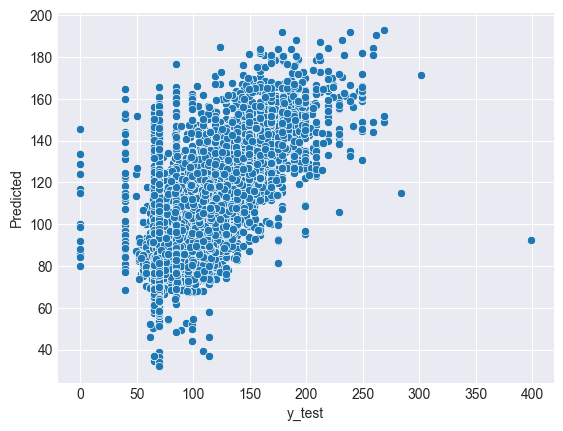

CPU times: total: 62.5 ms
Wall time: 621 ms


,Actual,Prediction,Diff
12621,75.60,90.057240,-14.46
25539,118.15,94.815615,23.33
30338,117.60,92.470538,25.13
19064,104.00,72.888776,31.11
16337,99.00,83.837431,15.16
...,...,...,...
14948,70.00,76.651402,-6.65
26369,103.09,124.361819,-21.27
9551,148.81,127.044254,21.77
4216,143.65,126.298813,17.35


In [291]:
%%time
lr = LinearRegression()
model_lr, df_lr = model(lr, X_train1, y_train1, X_test1, y_test1, X1, y1)
df_lr

ML Algorithm     : DecisionTreeRegressor()
R2 Score (train) : 0.9694444987184047
R2 Score (test)  : 0.7053775227720522
CV Scores        : [0.71065659 0.63751623 0.71924286 0.71073197 0.69391207]
CV Scores mean   : 0.6944119430788295
MAE rate         : 9.074883698581239
MSE rate         : 362.60306901287566
RMSE rate        : 19.042139297171303


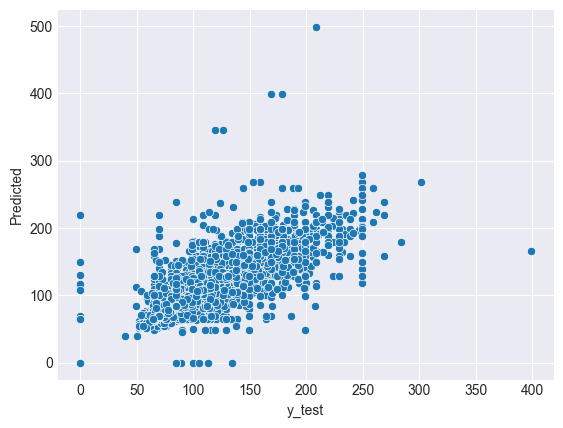

CPU times: total: 234 ms
Wall time: 691 ms


,Actual,Prediction,Diff
12621,75.60,104.160000,-28.56
25539,118.15,118.150000,0.00
30338,117.60,111.233333,6.37
19064,104.00,104.000000,0.00
16337,99.00,99.000000,0.00
...,...,...,...
14948,70.00,70.000000,0.00
26369,103.09,107.100000,-4.01
9551,148.81,154.230000,-5.42
4216,143.65,160.650000,-17.00


In [292]:
%%time
dt = DecisionTreeRegressor()
model_dt, df_dt = model(dt, X_train1, y_train1, X_test1, y_test1, X1, y1)
df_dt

ML Algorithm     : RandomForestRegressor()
R2 Score (train) : 0.9477886030982586
R2 Score (test)  : 0.8144379908822093
CV Scores        : [0.81975805 0.71909782 0.81478151 0.81480767 0.8124369 ]
CV Scores mean   : 0.7961763902000186
MAE rate         : 7.845906476865903
MSE rate         : 228.37821007881848
RMSE rate        : 15.112187468358725


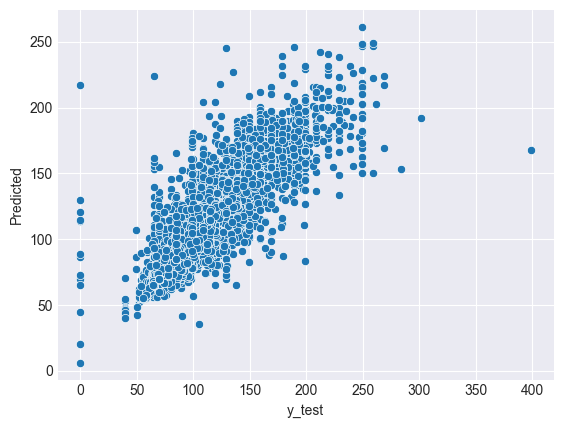

CPU times: total: 16.7 s
Wall time: 28.6 s


,Actual,Prediction,Diff
12621,75.60,84.480940,-8.88
25539,118.15,118.150000,0.00
30338,117.60,113.217667,4.38
19064,104.00,92.726833,11.27
16337,99.00,99.706333,-0.71
...,...,...,...
14948,70.00,70.000000,0.00
26369,103.09,123.386000,-20.30
9551,148.81,150.007000,-1.20
4216,143.65,140.295900,3.35


In [293]:
%%time
rf = RandomForestRegressor()
model_rf, df_rf = model(rf, X_train1, y_train1, X_test1, y_test1, X1, y1)
df_rf

ML Algorithm     : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)
R2 Score (train) : 0.884356137207287
R2 Score (test)  : 0.827269876100581
CV Scores        : [0.81889174 0.71751207 0.80772716 0.82129109 0.8359654 ]
CV Scores mean   : 0.8002774932606463
MAE rate         : 8.57438753481055
MSE rate         : 212.58552173684012
RMSE rate      

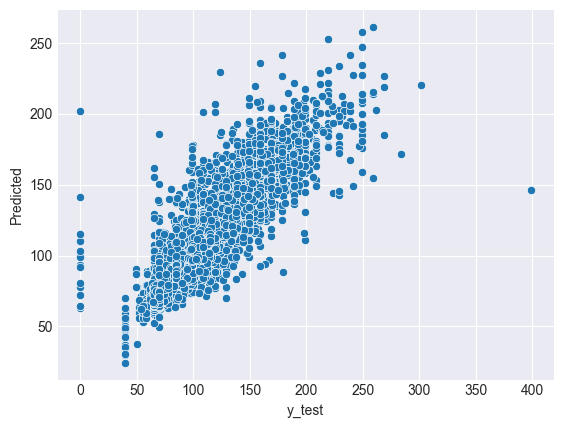

CPU times: total: 19.6 s
Wall time: 3.46 s


,Actual,Prediction,Diff
12621,75.60,85.283714,-9.68
25539,118.15,101.779701,16.37
30338,117.60,110.101845,7.50
19064,104.00,94.445221,9.55
16337,99.00,96.509598,2.49
...,...,...,...
14948,70.00,70.918358,-0.92
26369,103.09,111.684311,-8.59
9551,148.81,141.918472,6.89
4216,143.65,148.033325,-4.38


In [294]:
%%time
xg = XGBRegressor()
model_xg, df_xg = model(xg, X_train1, y_train1, X_test1, y_test1, X1, y1)
df_xg

In [295]:
Model_interpretions = pd.DataFrame(list(zip(algo, r2, CV, r_2, mae_value, mse_value, rmse_val)),
    columns =['ML Algorithms', 'Training Score', 'CV Mean Score', 'Testing score', 'MAE Rate', 'MSE Rate', 'RMSE Rate'])

In [296]:
Model_interpretions = Model_interpretions.sort_values(by='Testing score', ascending=False)
Model_interpretions.reset_index(drop=True, inplace=True)
print(Model_interpretions['ML Algorithms'][0])
display(Model_interpretions)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)


,ML Algorithms,Training Score,CV Mean Score,Testing score,MAE Rate,MSE Rate,RMSE Rate
0,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.884356,0.800277,0.827270,8.574388,212.585522,14.580313
1,"(DecisionTreeRegressor(max_features=1.0, rando...",0.947789,0.796176,0.814438,7.845906,228.378210,15.112187
2,DecisionTreeRegressor(),0.969444,0.694412,0.705378,9.074884,362.603069,19.042139
3,LinearRegression(),0.443308,0.446147,0.452289,18.821508,674.088844,25.963221


In [297]:
p = d.copy(deep=True)

Class=2, n=9655 (30.704%)
Class=6, n=2911 (9.257%)
Class=7, n=2235 (7.108%)
Class=3, n=12259 (38.986%)
Class=5, n=2321 (7.381%)
Class=0, n=676 (2.150%)
Class=1, n=992 (3.155%)
Class=4, n=396 (1.259%)


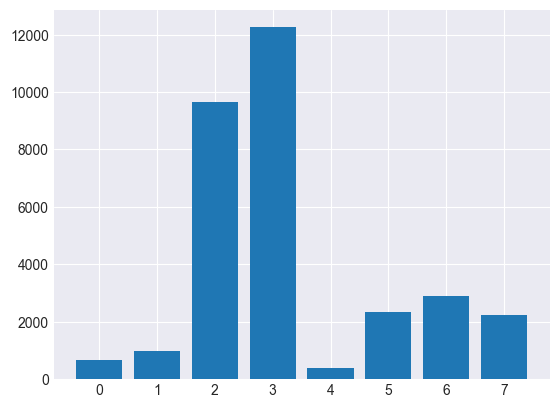

In [298]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

major = p.drop(["Type"], axis=1)
minor = p["Type"]

counter = Counter(minor)

for k,v in counter.items():
    per = v / len(minor) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
plt.bar(counter.keys(), counter.values())
plt.show()

Class=2, n=12259 (12.500%)
Class=6, n=12259 (12.500%)
Class=7, n=12259 (12.500%)
Class=3, n=12259 (12.500%)
Class=5, n=12259 (12.500%)
Class=0, n=12259 (12.500%)
Class=1, n=12259 (12.500%)
Class=4, n=12259 (12.500%)


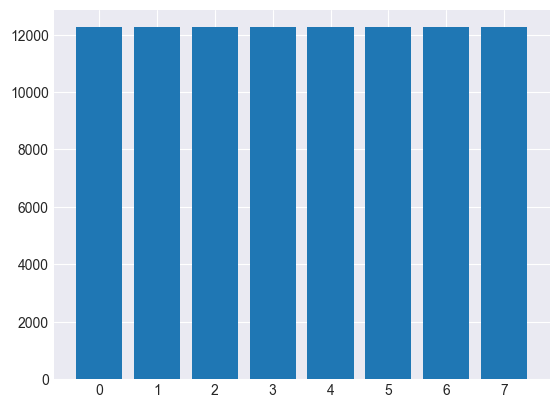

In [299]:
oversample = SMOTE()
major1, minor1 = oversample.fit_resample(major, minor)

# summarize distribution
counter = Counter(minor1)
for k,v in counter.items():
    per = v / len(minor1) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
plt.bar(counter.keys(), counter.values())
plt.show()

In [300]:
data_smote = pd.concat([major1, minor1], axis=1)

print(data_smote.duplicated().sum())
data_smote = shuffle(data_smote)
data_smote

13371


,Year,Month,Days,DayOfWeek,IsWeekend,IsHoliday,Nights,RateCode,TrackCode,Occupied,ADR,Rate,Type
19081,2022,10,17,0,0,0,1,106,1,99,84.110000,65.000000,5
25662,2022,5,16,0,0,0,1,0,1,99,81.260000,90.000000,7
67178,2022,2,18,1,0,0,3,52,1,97,80.759485,96.273866,4
67646,2021,9,5,0,0,0,4,24,0,100,77.583962,70.000000,4
20754,2021,4,4,6,1,0,5,25,0,73,79.440000,70.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37242,2022,11,8,3,0,0,1,0,1,89,102.513999,109.000000,0
9406,2022,12,18,6,1,0,1,106,1,61,79.010000,113.050000,6
52385,2022,2,20,6,1,0,2,1,1,92,107.710000,125.000000,1
79652,2021,5,15,0,0,0,1,103,1,98,82.362065,85.000000,6


In [305]:
X1 = data_smote.drop(columns=["Rate"], axis=1)
y1 = data_smote["Rate"]

print('X component shape:', X1.shape, '\ny component shape:', y1.shape)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30, random_state=44)
print('\nX_train size :{} \nX_test size  :{} \ny_train size :{} \ny_test size  :{}'.format(len(X_train1),
                            len(X_test1), len(y_train1), len(y_test1)))

X component shape: (98072, 12) 
y component shape: (98072,)

X_train size :68650 
X_test size  :29422 
y_train size :68650 
y_test size  :29422


In [302]:
model = list()
resample = list()
training_acc = list()
testing_acc = list()
cv_acc = list()
mae_value = list()
rmse_value = list()

def test_eval(algorithm, x_train_, y_train_, x_test_, y_test_, X, y, algo=None, sampling=None):
   
    predicts = algorithm.predict(x_test_)

    R2 = algorithm.score(x_train_, y_train_)
    R_2 = r2_score(y_test_, predicts)
    print('Training score : ', R2)
    print('Testing score  : ', R_2)
    
    cross_val = cross_val_score(algorithm, X, y, cv=cv)
    mae = mean_absolute_error(y_test_, predicts)
    mse = mean_squared_error(y_test_, predicts)
    rmse = np.sqrt(mean_squared_error(y_test_, predicts))
    print('CV score       : ', cross_val.mean())
    print('MAE score      : ', mae)
    print('RMSE score     : ', rmse)
  
          
    model.append(algo)
    resample.append(sampling)
    training_acc.append(R2)
    testing_acc.append(R_2)
    cv_acc.append(cross_val.mean())
    mae_value.append(mae)
    rmse_value.append(rmse)

In [303]:
%%time
xg = XGBRegressor()
xg.fit(X_train1, y_train1)
test_eval(xg, X_train1, y_train1, X_test1, y_test1, X1, y1, 'XGB', 'SMOTE')

# %%time
# xg = XGBRegressor()
# model_xg, df_xg = model(xg, X_train1, y_train1, X_test1, y_test1, X1, y1)
# df_xg


Training score :  0.8731485219316619
Testing score  :  0.8104377715482511
CV score       :  0.8282733999133122
MAE score      :  8.643361562555988
RMSE score     :  15.443114629229521
CPU times: total: 1min 46s
Wall time: 18.3 s


In [304]:
%%time
rf = RandomForestRegressor()
rf.fit(X_train1, y_train1)
test_eval(rf, X_train1, y_train1, X_test1, y_test1, X1, y1, 'RFR', 'SMOTE')

# %%time
# rf = RandomForestRegressor()
# model_rf, df_rf = model(rf, X_train1, y_train1, X_test1, y_test1, X1, y1)
# df_rf

Training score :  0.9769605762190727
Testing score  :  0.8634468183410988
CV score       :  0.8882625621711165
MAE score      :  5.223399774658071
RMSE score     :  13.107199330379407
CPU times: total: 1min 14s
Wall time: 2min 31s


In [307]:
data_adasyn = pd.concat([major1, minor1], axis=1)

print(data_adasyn.duplicated().sum())
data_adasyn = shuffle(data_adasyn)
data_adasyn

13371


,Year,Month,Days,DayOfWeek,IsWeekend,IsHoliday,Nights,RateCode,TrackCode,Occupied,ADR,Rate,Type
63681,2022,5,3,1,0,0,1,1,1,98,86.498392,90.748429,4
25815,2022,9,6,1,0,0,1,9,1,100,32.560000,95.760000,3
67776,2022,2,23,2,0,0,1,103,1,99,98.444155,85.000000,4
80797,2021,9,6,1,0,0,1,24,0,98,85.864562,70.000000,6
22073,2021,9,13,0,0,0,4,5,1,90,81.040000,65.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49094,2022,7,29,5,0,0,1,99,2,75,92.471031,107.863420,1
93550,2021,4,23,5,1,0,1,3,0,100,120.562362,67.928801,7
70933,2021,12,28,1,0,0,3,59,3,87,76.940000,105.709126,5
20219,2022,3,3,3,0,0,1,0,1,93,86.110000,85.000000,3


In [308]:
X1 = data_adasyn.drop(columns=["Rate"], axis=1)
y1 = data_adasyn["Rate"]

print('X component shape:', X1.shape, '\ny component shape:', y1.shape)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30, random_state=55)
print('\nX_train size :{} \nX_test size  :{} \ny_train size :{} \ny_test size  :{}'.format(len(X_train1),
                            len(X_test1), len(y_train1), len(y_test1)))

X component shape: (98072, 12) 
y component shape: (98072,)

X_train size :68650 
X_test size  :29422 
y_train size :68650 
y_test size  :29422


In [309]:
%%time
xg = XGBRegressor()
xg.fit(X_train1, y_train1)
test_eval(xg, X_train1, y_train1, X_test1, y_test1, X1, y1, 'XGB', 'ADASYN')

# %%time
# xg = XGBRegressor()
# model_xg, df_xg = model(xg, X_train1, y_train1, X_test1, y_test1, X1, y1)
# df_xg

Training score :  0.8712138429514966
Testing score  :  0.8141897630144217
CV score       :  0.8290706809001204
MAE score      :  8.706164118902821
RMSE score     :  15.389957904304742
CPU times: total: 1min 49s
Wall time: 23.3 s


In [310]:
%%time
rf = RandomForestRegressor()
rf.fit(X_train1, y_train1)
test_eval(rf, X_train1, y_train1, X_test1, y_test1, X1, y1, 'RFR', 'ADASYN')

# %%time
# rf = RandomForestRegressor()
# model_rf, df_rf = model(rf, X_train1, y_train1, X_test1, y_test1, X1, y1)
# df_rf

Training score :  0.9766283842826519
Testing score  :  0.8733875174894682
CV score       :  0.8877382968432634
MAE score      :  5.164796161168871
RMSE score     :  12.704011416932476
CPU times: total: 1min 10s
Wall time: 2min 51s


In [311]:
%%time
kn = KNeighborsRegressor()
kn.fit(X_train1, y_train1)
test_eval(kn, X_train1, y_train1, X_test1, y_test1, X1, y1, 'KNN', 'ADASYN')

# %%time
# kn = KNeighborsRegressor()
# model_kn, df_kn = model(kn, X_train1, y_train1, X_test1, y_test1, X1, y1)
# df_kn

Training score :  0.889565882976222
Testing score  :  0.8041578206192124
CV score       :  0.8267502552887558
MAE score      :  6.85077185512874
RMSE score     :  15.799950633577552
CPU times: total: 5.92 s
Wall time: 15.1 s


In [412]:
p = d.copy(deep=True)
p

,Year,Month,Days,DayOfWeek,IsWeekend,IsHoliday,Nights,Type,RateCode,TrackCode,Occupied,ADR,Rate
0,2022,10,31,0,0,0,4,2,68,0,81,76.61,40.00
1,2022,9,29,3,0,0,1,2,55,1,100,88.65,110.30
2,2022,5,13,4,0,0,2,6,0,1,100,115.42,159.00
3,2022,5,25,2,0,0,2,7,78,0,100,88.40,96.75
4,2022,6,24,4,0,0,1,2,4,0,100,128.01,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31440,2022,7,27,2,0,0,1,6,55,1,98,90.77,101.75
31441,2022,10,3,0,0,0,5,5,3,0,100,84.11,70.00
31442,2022,5,23,0,0,0,1,2,0,0,88,85.50,114.00
31443,2022,3,24,3,0,0,1,3,15,1,99,83.38,85.00


Class=2, n=9655 (30.704%)
Class=6, n=2911 (9.257%)
Class=7, n=2235 (7.108%)
Class=3, n=12259 (38.986%)
Class=5, n=2321 (7.381%)
Class=0, n=676 (2.150%)
Class=1, n=992 (3.155%)
Class=4, n=396 (1.259%)


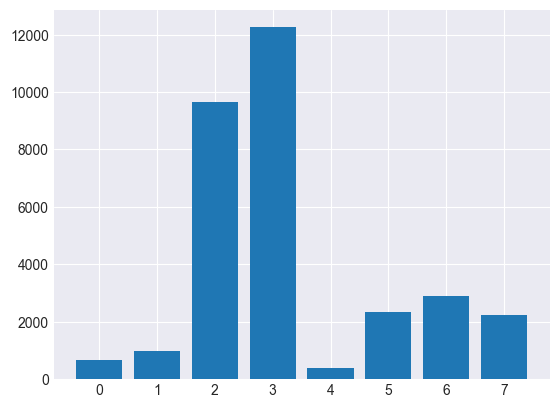

In [313]:
from collections import Counter
from imblearn.combine import SMOTEENN


major = p.drop(["Type"], axis=1)
minor = p["Type"]

counter = Counter(minor)

for k,v in counter.items():
    per = v / len(minor) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
plt.bar(counter.keys(), counter.values())
plt.show()

Class=0, n=9395 (17.917%)
Class=1, n=8524 (16.256%)
Class=2, n=3285 (6.265%)
Class=3, n=2999 (5.719%)
Class=4, n=10012 (19.093%)
Class=5, n=6345 (12.100%)
Class=6, n=5575 (10.632%)
Class=7, n=6302 (12.018%)


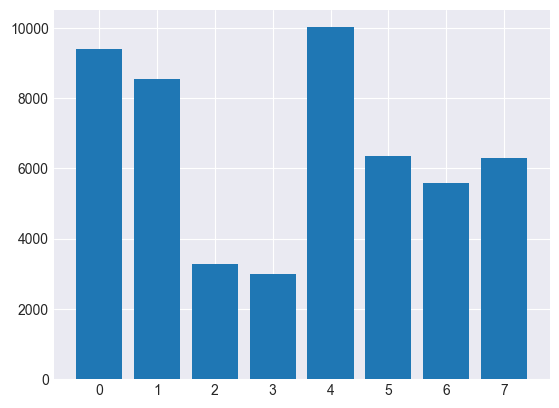

In [314]:
oversample = SMOTEENN()
major1, minor1 = oversample.fit_resample(major, minor)

# summarize distribution
counter = Counter(minor1)
for k,v in counter.items():
    per = v / len(minor1) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
plt.bar(counter.keys(), counter.values())
plt.show()

In [315]:
data_smoteenn = pd.concat([major1,minor1], axis=1)

print(data_smoteenn.duplicated().sum())
data_smoteenn = shuffle(data_smoteenn)
data_smoteenn

5719


,Year,Month,Days,DayOfWeek,IsWeekend,IsHoliday,Nights,RateCode,TrackCode,Occupied,ADR,Rate,Type
580,2022,3,3,0,0,0,1,6,1,97,82.913217,81.079417,0
40739,2022,7,7,3,0,0,1,41,4,99,122.270000,103.500000,6
27593,2022,7,18,4,0,0,4,9,0,100,131.929732,159.331068,4
30643,2022,10,22,5,1,0,1,61,1,74,86.554813,108.417418,4
37628,2022,11,25,4,0,0,1,64,1,61,80.864852,91.942702,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14998,2022,4,20,3,0,0,1,19,1,100,92.134152,84.625754,1
25284,2021,1,10,0,0,0,1,105,1,82,72.622681,81.028921,4
28077,2022,6,9,4,0,0,1,64,1,100,132.259694,118.192789,4
13854,2022,8,14,1,0,0,1,69,0,100,82.735908,92.285108,1


In [316]:
X1 = data_smoteenn.drop(columns=["Rate"], axis=1)
y1 = data_smoteenn["Rate"]

print('X component shape:', X1.shape, '\ny component shape:', y1.shape)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30, random_state=32)
print('\nX_train size :{} \nX_test size  :{} \ny_train size :{} \ny_test size  :{}'.format(len(X_train1),
                            len(X_test1), len(y_train1), len(y_test1)))


# r2_value, act, pred = model_base(X_base, y_base)

X component shape: (52437, 12) 
y component shape: (52437,)

X_train size :36705 
X_test size  :15732 
y_train size :36705 
y_test size  :15732


In [317]:
%%time
xg = XGBRegressor()
xg.fit(X_train1, y_train1)
test_eval(xg, X_train1, y_train1, X_test1, y_test1, X1, y1, 'XGB', 'SMOTEENN')

# %%time
# xg = XGBRegressor()
# model_xg, df_xg = model(xg, X_train1, y_train1, X_test1, y_test1, X1, y1)
# df_xg

Training score :  0.9121253918756834
Testing score  :  0.8156470645601472
CV score       :  0.8465343417771891
MAE score      :  8.037469724274004
RMSE score     :  15.141501849689789
CPU times: total: 1min 15s
Wall time: 14.4 s


In [318]:
%%time
rf = RandomForestRegressor()
rf.fit(X_train1, y_train1)
test_eval(rf, X_train1, y_train1, X_test1, y_test1, X1, y1, 'RFR', 'SMOTEENN')

# %%time
# rf = RandomForestRegressor()
# model_rf, df_rf = model(rf, X_train1, y_train1, X_test1, y_test1, X1, y1)
# df_rf

Training score :  0.9859527156083319
Testing score  :  0.8867359017842369
CV score       :  0.9183831796883648
MAE score      :  3.8412384895193568
RMSE score     :  11.868342234680535
CPU times: total: 40.4 s
Wall time: 1min 15s


In [319]:
%%time
kn = KNeighborsRegressor()
kn.fit(X_train1, y_train1)
test_eval(kn, X_train1, y_train1, X_test1, y_test1, X1, y1, 'KNN', 'SMOTEENN')

# %%time
# kn = KNeighborsRegressor()
# model_kn, df_kn = model(kn, X_train1, y_train1, X_test1, y_test1, X1, y1)
# df_kn

Training score :  0.9150463810434448
Testing score  :  0.8285973392427319
CV score       :  0.86723640102432
MAE score      :  5.348838047790032
RMSE score     :  14.599994931334251
CPU times: total: 2.5 s
Wall time: 4.47 s


In [324]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X1, y1)

ExtraTreesRegressor()

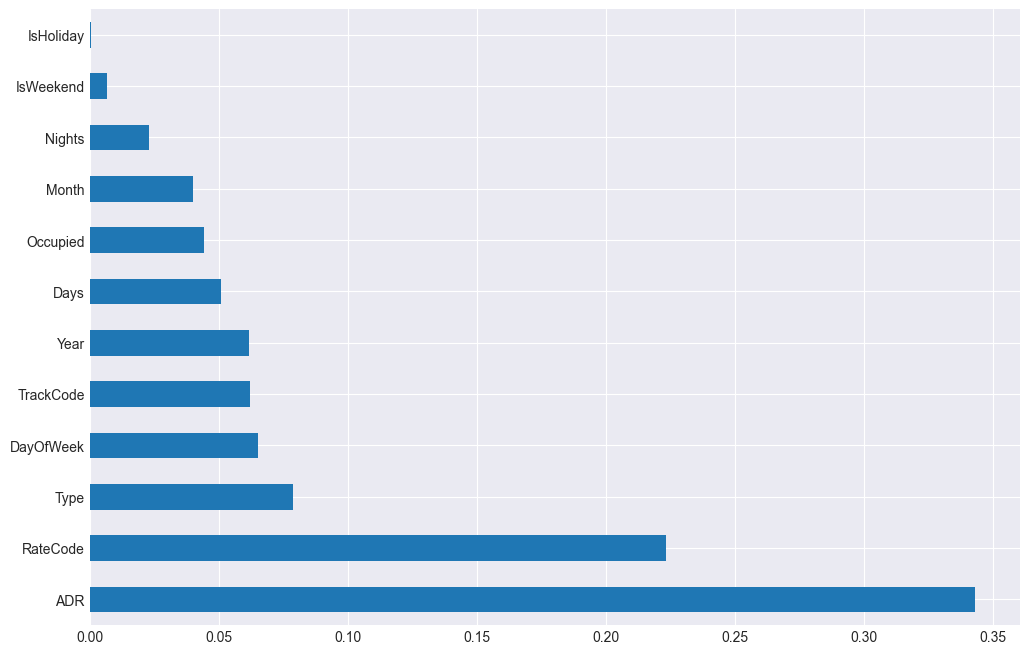

In [375]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X1.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [335]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [331]:
X = d.drop(columns=["Rate"], axis=1)
y = d["Rate"]

In [332]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [333]:
from sklearn.model_selection import KFold,cross_val_score

In [336]:
models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('SVM', SVR()))
models.append(('AdaBoost', AdaBoostRegressor()))
models.append(('XGB', XGBRFRegressor()))


results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_result =cross_val_score(model,X_train,y_train,cv=kfold)
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

KNN 0.6819476801016444
CART 0.6364901614803994
RF 0.7887567865847072
SVM 0.07006005911527466
AdaBoost 0.32364728239392837
XGB 0.695928355724914


In [337]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [341]:
y_pred = reg_rf.predict(X_test)

In [339]:
reg_rf.score(X_train, y_train)

0.9453355623005809

In [340]:
reg_rf.score(X_test, y_test)

0.7957959782292652

In [342]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1500, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = reg_rf, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 10,
                               verbose=2,
                               random_state=11, n_jobs = 5)


rf_random.fit(X_train,y_train)

rf_random.best_params_


In [353]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [354]:

rf_random = RandomizedSearchCV(estimator = reg_rf, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 10,
                               verbose=2,
                               random_state=11, n_jobs = 5)

In [355]:
rf_random.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=5,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19,
                                                              20, 21, 22, 23,
                                                              24, 25, 26, 27,
                                                              28, 29, 30, ...],
                                        'n_estimators': [50, 181, 313, 445, 577,
                                                         709, 840, 972, 1104,
                                                         1236, 1368, 1500]},
                   random_state=11, scoring='neg_mean_squared_error',
                   verbose=2)

In [356]:
rf_random.best_params_

{'n_estimators': 445,
 'min_samples_split': 28,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 25}

In [357]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [358]:
mean_absolute_error(y_test, y_pred)

7.788138978674469

In [359]:
mean_squared_error(y_test, y_pred)

249.3523708378158

In [360]:
r2_score(y_test, y_pred)

0.7957959782292652

In [362]:
reg_rf = RandomForestRegressor(n_estimators=445, min_samples_split=28, min_samples_leaf=6,max_features='auto', max_depth=25)

reg_rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=25, max_features='auto', min_samples_leaf=6,
                      min_samples_split=28, n_estimators=445)

In [368]:
y_pred = reg_rf.predict(X_test)

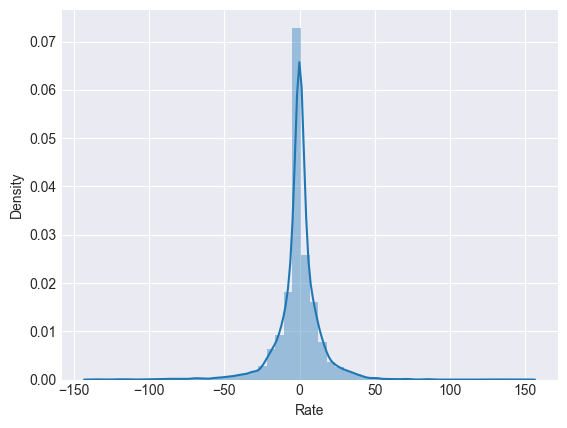

In [369]:
sns.distplot(y_test-y_pred)
plt.show()

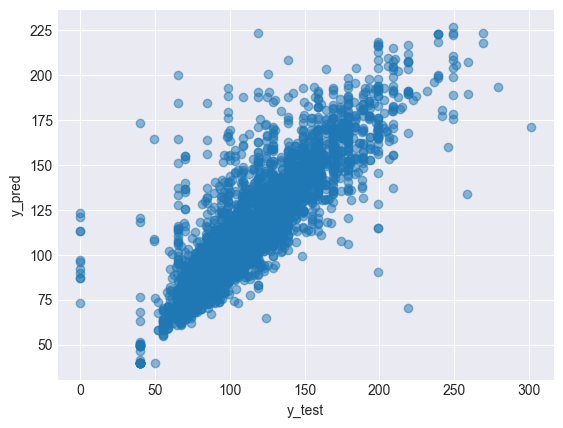

In [370]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [365]:
r2_score(y_test, y_pred)

0.8064526146337662

## exp1

In [475]:
ex1df = d.copy()

In [506]:
ex1df

,Year,Month,Days,DayOfWeek,IsWeekend,IsHoliday,Nights,Type,RateCode,TrackCode,Occupied,ADR,Rate
0,2022,10,31,0,0,0,4,2,68,0,81,76.61,40.00
1,2022,9,29,3,0,0,1,2,55,1,100,88.65,110.30
2,2022,5,13,4,0,0,2,6,0,1,100,115.42,159.00
3,2022,5,25,2,0,0,2,7,78,0,100,88.40,96.75
4,2022,6,24,4,0,0,1,2,4,0,100,128.01,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31440,2022,7,27,2,0,0,1,6,55,1,98,90.77,101.75
31441,2022,10,3,0,0,0,5,5,3,0,100,84.11,70.00
31442,2022,5,23,0,0,0,1,2,0,0,88,85.50,114.00
31443,2022,3,24,3,0,0,1,3,15,1,99,83.38,85.00


In [415]:
ex1df.drop(['Year', 'IsWeekend','IsHoliday'], axis=1, inplace=True)

In [416]:
ex1df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31445 entries, 0 to 31444
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      31445 non-null  int32  
 1   Days       31445 non-null  int32  
 2   DayOfWeek  31445 non-null  int64  
 3   Nights     31445 non-null  int32  
 4   Type       31445 non-null  int32  
 5   RateCode   31445 non-null  int32  
 6   TrackCode  31445 non-null  int32  
 7   Occupied   31445 non-null  int32  
 8   ADR        31445 non-null  float64
 9   Rate       31445 non-null  float64
dtypes: float64(2), int32(7), int64(1)
memory usage: 1.6 MB


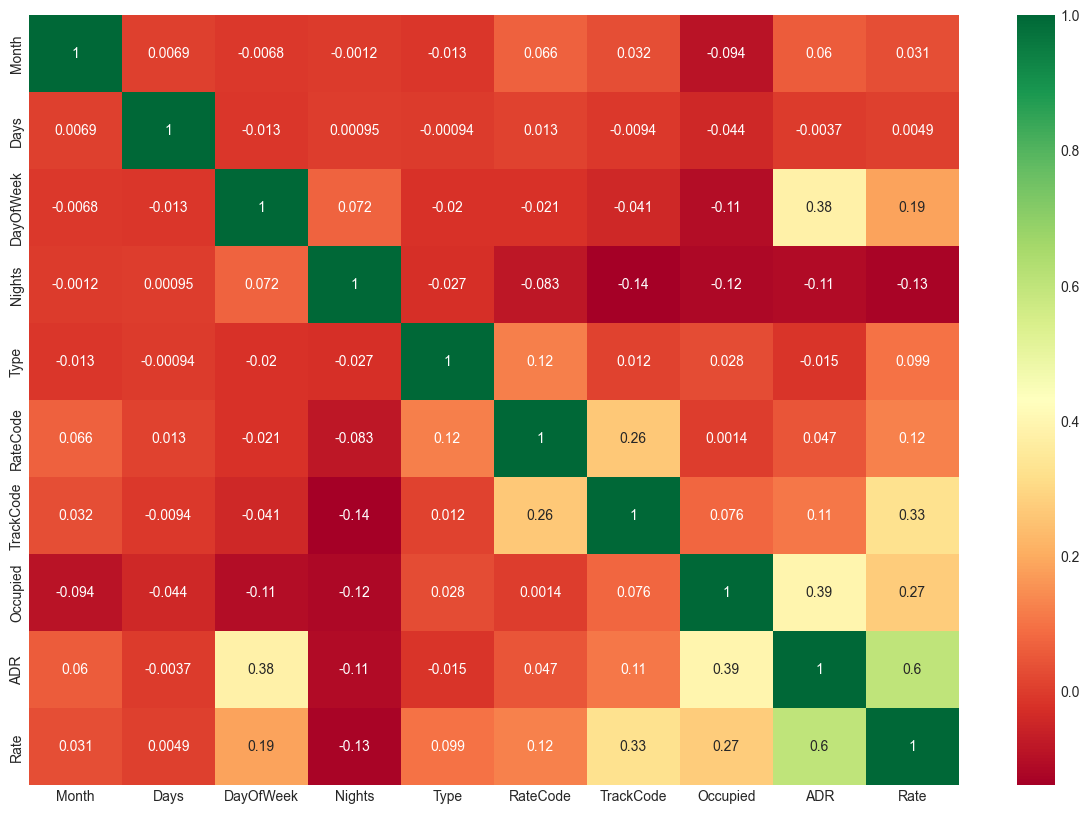

In [418]:
plt.figure(figsize = (15,10))
sns.heatmap(ex1df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

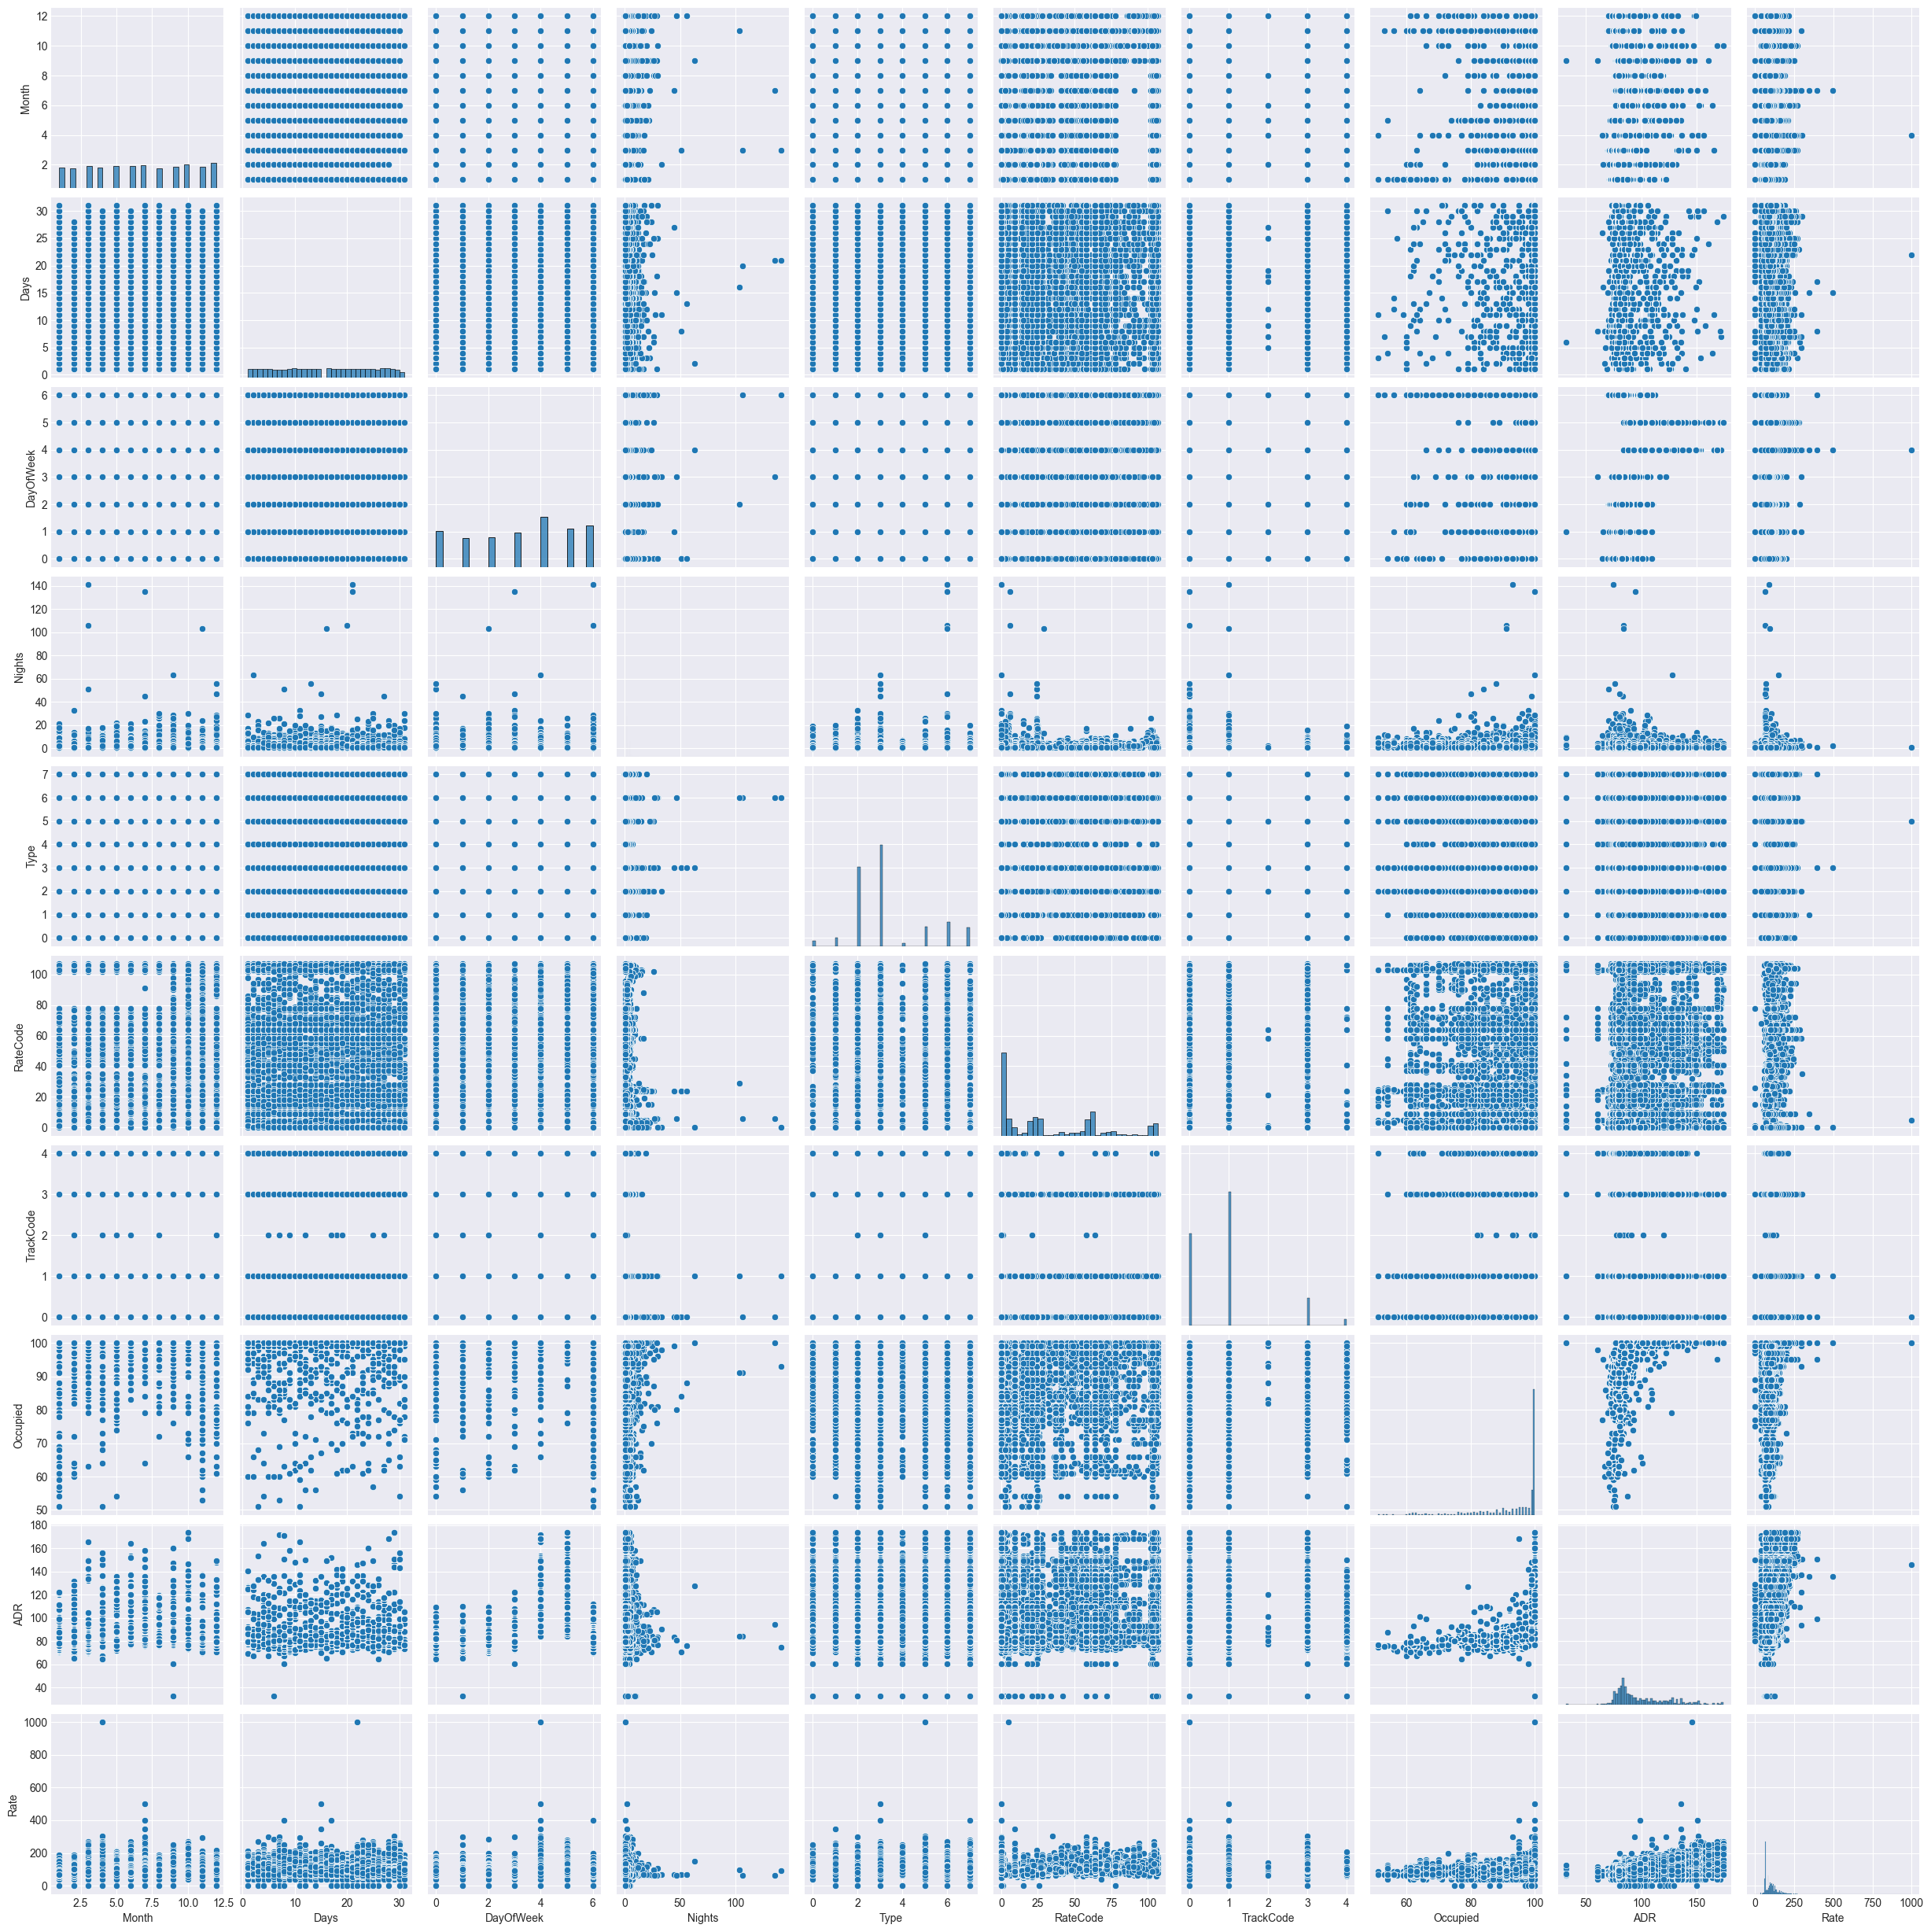

In [389]:

# importing packages
import seaborn
import matplotlib.pyplot as plt
 
############# Main Section ############
# pairplot with hue sex
seaborn.pairplot(ex1df)
# to show
plt.show()

In [420]:
X = ex1df.drop(columns=["Rate"], axis=1)
y = ex1df["Rate"]

In [447]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [454]:
from sklearn.model_selection import RandomizedSearchCV
reg_rf = RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1500, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 50, num = 5)]
min_samples_split = [10,20,30,40,50,60,70,80,90,100,15,25,35,45,55,65,75,85,95]
min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = reg_rf, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 10,
                               verbose=2,
                               random_state=11, n_jobs = 5)



In [455]:
rf_random.fit(X_train,y_train)

rf_random.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 1500,
 'min_samples_split': 35,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 27}

In [404]:
# models = []
# models.append(('KNN', KNeighborsRegressor()))
# models.append(('CART', DecisionTreeRegressor()))
# models.append(('RF', RandomForestRegressor()))
# models.append(('SVM', SVR()))
# models.append(('AdaBoost', AdaBoostRegressor()))
# models.append(('XGB', XGBRFRegressor()))


# results = []
# names = []
# for name,model in models:
#     kfold = KFold(n_splits=10)
#     cv_result =cross_val_score(model,X_train,y_train,cv=kfold)
#     names.append(name)
#     results.append(cv_result)
# for i in range(len(names)):
#     print(names[i],results[i].mean())

KNN 0.6904854419139952
CART 0.6450535324854518
RF 0.7921794108041313
SVM 0.42892325536525844
AdaBoost 0.45300693238962664
XGB 0.7009258283819559


In [456]:
y_pred = rf_random.predict(X_test)

In [457]:
rf_random.score(X_train, y_train)

-186.070989447885

In [458]:
rf_random.score(X_test, y_test)

-348.98547721256

## ex2df

# normalisation

In [463]:
from sklearn import preprocessing

In [460]:
ex2df=ex1df.copy()

In [485]:
ex2df.drop(['level_0', 'index'], axis=1, inplace=True)

In [488]:
ex2df.tail(20)


,Month,Days,DayOfWeek,Nights,Type,RateCode,TrackCode,Occupied,ADR,Rate
31425,8,16,1,1,3,0,3,100,84.00,118.60
31426,2,16,2,1,3,25,0,100,110.27,70.00
31427,3,20,6,6,2,64,0,91,83.91,108.30
31428,2,4,4,1,3,0,1,100,111.79,139.00
31429,11,11,4,1,2,48,1,100,137.21,144.50
31430,12,3,5,1,6,15,0,99,133.03,65.00
31431,3,6,6,5,2,3,0,83,80.13,70.00
31432,9,13,0,1,2,5,0,90,81.04,65.00
31433,11,16,2,1,0,78,1,91,84.23,81.75
31434,10,31,0,4,2,0,1,81,76.61,114.00


In [501]:
ex2df['RateCode'] = pd.Series([1,2])

In [503]:
ex2df['RateCode'].fillna(1,inplace=True)

In [534]:
ex1df

,Year,Month,Days,DayOfWeek,IsWeekend,IsHoliday,Nights,Type,RateCode,TrackCode,Occupied,ADR,Rate
0,2022,10,31,0,0,0,4,2,68,0,81,76.61,40.00
1,2022,9,29,3,0,0,1,2,55,1,100,88.65,110.30
2,2022,5,13,4,0,0,2,6,0,1,100,115.42,159.00
3,2022,5,25,2,0,0,2,7,78,0,100,88.40,96.75
4,2022,6,24,4,0,0,1,2,4,0,100,128.01,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31440,2022,7,27,2,0,0,1,6,55,1,98,90.77,101.75
31441,2022,10,3,0,0,0,5,5,3,0,100,84.11,70.00
31442,2022,5,23,0,0,0,1,2,0,0,88,85.50,114.00
31443,2022,3,24,3,0,0,1,3,15,1,99,83.38,85.00


In [564]:
df3 = ex1df[ex1df['Year'] ==2022]

In [565]:
df3

,Year,Month,Days,DayOfWeek,IsWeekend,IsHoliday,Nights,Type,RateCode,TrackCode,Occupied,ADR,Rate
0,2022,10,31,0,0,0,4,2,68,0,81,76.61,40.00
1,2022,9,29,3,0,0,1,2,55,1,100,88.65,110.30
2,2022,5,13,4,0,0,2,6,0,1,100,115.42,159.00
3,2022,5,25,2,0,0,2,7,78,0,100,88.40,96.75
4,2022,6,24,4,0,0,1,2,4,0,100,128.01,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31439,2022,5,15,6,1,0,5,2,25,0,96,84.20,70.00
31440,2022,7,27,2,0,0,1,6,55,1,98,90.77,101.75
31441,2022,10,3,0,0,0,5,5,3,0,100,84.11,70.00
31442,2022,5,23,0,0,0,1,2,0,0,88,85.50,114.00


In [615]:
df3.drop(['Type'], axis=1, inplace=True)

In [533]:
df3['RateCode'] = df3['RateCode']/100

In [545]:
df3['Occupied'] = df3['Occupied']/100

In [593]:
df3

,Type,Occupied,ADR,Rate
0,2,81,76.61,40.00
1,2,100,88.65,110.30
2,6,100,115.42,159.00
3,7,100,88.40,96.75
4,2,100,128.01,70.00
...,...,...,...,...
31439,2,96,84.20,70.00
31440,6,98,90.77,101.75
31441,5,100,84.11,70.00
31442,2,88,85.50,114.00


In [594]:
df3.sort_values(by=['Type'])

,Type,Occupied,ADR,Rate
21649,0,100,88.65,80.60
10306,0,85,81.53,65.00
20406,0,90,87.62,105.00
20400,0,100,107.72,132.05
10299,0,94,82.90,112.90
...,...,...,...,...
5149,7,99,81.26,103.55
18920,7,98,81.23,86.16
26896,7,76,79.59,85.00
18913,7,95,85.00,85.00


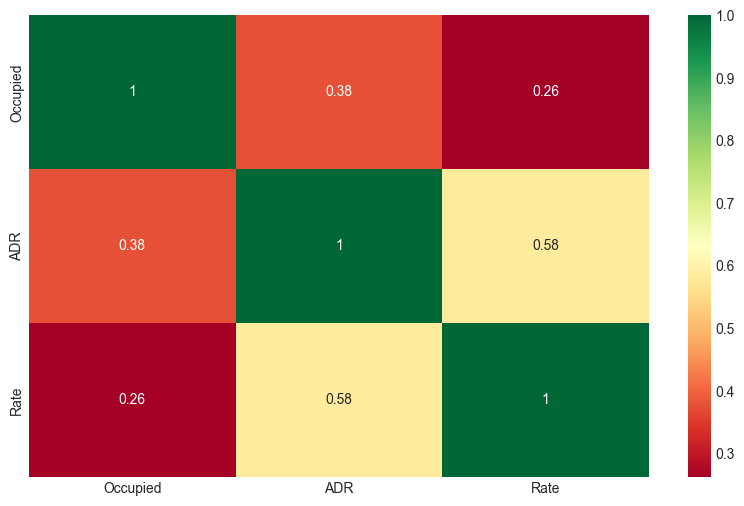

In [616]:
plt.figure(figsize = (10,6))
sns.heatmap(df3.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [617]:
X = df3.drop('Rate',axis=1)
y = df3.Rate

In [618]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [619]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [620]:
y_pred = reg_rf.predict(X_test)

In [621]:
reg_rf.score(X_train, y_train)

0.36664137657949947

In [622]:
reg_rf.score(X_test, y_test)

0.3599368606431371